In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
data = pd.read_csv('Placement_Data.csv')

In [139]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [140]:
data.fillna(0, inplace = True)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


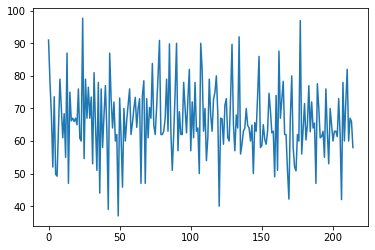

In [142]:
plt.plot(data['hsc_p'], data = data)

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le = LabelEncoder()

In [145]:
data['gender'] = le.fit_transform(data['gender'])
data['ssc_b'] = le.fit_transform(data['ssc_b'])
data['hsc_b'] = le.fit_transform(data['hsc_b'])
data['hsc_s'] = le.fit_transform(data['hsc_s'])
data['degree_t'] = le.fit_transform(data['degree_t'])
data['workex'] = le.fit_transform(data['workex'])
data['specialisation'] = le.fit_transform(data['specialisation'])
data['status'] = le.fit_transform(data['status'])

In [146]:
x = data.iloc[: , 0:-1].values
y = data.iloc[:,-1].values

## using train test split

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=24)

In [149]:
x_train

array([[127.  ,   0.  ,  79.  , ...,   0.  ,  68.2 ,   1.  ],
       [ 84.  ,   1.  ,  84.  , ...,   0.  ,  66.69,   1.  ],
       [ 31.  ,   0.  ,  64.  , ...,   1.  ,  56.7 ,   1.  ],
       ...,
       [193.  ,   1.  ,  65.2 , ...,   0.  ,  57.34,   1.  ],
       [132.  ,   0.  ,  74.9 , ...,   0.  ,  60.78,   1.  ],
       [163.  ,   1.  ,  74.2 , ...,   0.  ,  66.06,   1.  ]])

## **Use standardization and perform Linear Regression**


In [150]:
ss = StandardScaler()

In [151]:
X = ss.fit_transform(x_train)

In [152]:
X.shape

(129, 14)

In [153]:
x_test = ss.transform(x_test)

### perform linear regression


In [154]:
le = LinearRegression()

In [155]:
le.fit(X,y_train)

LinearRegression()

In [156]:
y_pred = le.predict(x_test)

In [157]:
le.intercept_

209116.27906976742

In [158]:
le.coef_

array([   779.41160231,   9962.01201666, -12314.17111064,   5061.02355916,
         4831.74511687,  -6538.04084171,  -5465.48938734,  -3167.90332743,
         6824.13692798,   4982.47003355,  17046.94613308,  -2958.70033739,
        16396.55752817, 131920.36148605])

In [159]:
y_pred.shape

(86,)

In [160]:
y_test.shape

(86,)

In [161]:
print("Mean Squared error :", metrics.mean_squared_error(y_test,y_pred))

Mean Squared error : 4748245307.12037


In [162]:
print("Mean Absolute error :", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute error : 42728.23115718905


In [163]:
print("Root square error :", metrics.r2_score(y_test,y_pred))

Root square error : 0.7884780715903983


In [164]:
print('Root mean squared error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean squared error : 68907.51270449666


# Logistic Regression

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int32  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    int32  
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    int32  
 6   hsc_s           215 non-null    int32  
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    int32  
 9   workex          215 non-null    int32  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    int32  
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int32  
 14  salary          215 non-null    float64
dtypes: float64(6), int32(8), int64(1)
memory usage: 18.6 KB


In [166]:
data.drop('sl_no', axis = 1, inplace  = True)

In [167]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [168]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

**Extract the independent and dependent(Status) variables**


In [169]:
a = data.iloc[0:,:-2].values
b = data['status'].values

In [170]:
a.shape

(215, 12)

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(a,b, test_size=0.3, random_state=24)

In [172]:
stand= StandardScaler()

In [173]:
X_train = stand.fit_transform(X_train)

In [174]:
X_test = stand.transform(X_test)

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
lr = LogisticRegression()

In [177]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [178]:
Y_pred = lr.predict(X_test)

In [179]:
Y_test,Y_pred

(array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]))

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[15,  7],
       [ 3, 40]], dtype=int64)

In [181]:
TP = 40

In [182]:
TN = 15

In [183]:
FP = 7

In [184]:
FN = 3

<AxesSubplot:>

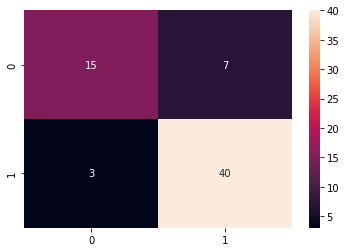

In [185]:
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot = True)

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(Y_test,Y_pred)

0.8461538461538461

In [188]:
from sklearn.metrics import roc_auc_score

In [189]:
roc_auc_score(Y_test,Y_pred)

0.8060253699788584

In [190]:
sum(Y_test == 0)

22

In [191]:
sum(Y_test == 1)

43

In [192]:
r = TP/(TP+FN)

In [193]:
p = (TP/(TP+FP))

In [194]:
r

0.9302325581395349

In [195]:
p

0.851063829787234

In [196]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.85      0.93      0.89        43

    accuracy                           0.85        65
   macro avg       0.84      0.81      0.82        65
weighted avg       0.85      0.85      0.84        65



--------------------------------------------------------------------------------------------------------------------------

In [197]:
house_data = pd.read_csv("House Data.csv")

In [198]:
house_data['Furnishing'].fillna('not', inplace = True)

In [199]:
house_data['Furnishing'].unique()

array(['Semi_Furnished', 'Unfurnished', 'Fully Furnished', 'not'],
      dtype=object)

In [200]:
house_data['Furnishing'] = le.fit_transform(house_data['Furnishing'])

AttributeError: 'LinearRegression' object has no attribute 'fit_transform'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
house_data['Property_Type'] = le.fit_transform(house_data['Property_Type'])
house_data['Power_Backup'] = le.fit_transform(house_data['Power_Backup'])
house_data['Water_Supply'] = le.fit_transform(house_data['Water_Supply'])
house_data['Furnishing'] = le.fit_transform(house_data['Furnishing'])
house_data['Crime_Rate'] = le.fit_transform(house_data['Crime_Rate'])
house_data['Dust_and_Noise'] = le.fit_transform(house_data['Dust_and_Noise'])

In [ ]:
house_data